In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/data.csv') #file with a big playlist from Spotify
pd.set_option("display.max_rows", 0)
df.head()

,id,song,artist,album,type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier,Hozier (Deluxe),audio_features,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,"Mike Posner, Gigamesh",31 Minutes to Takeoff,audio_features,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.689,0.625,129.965
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",Flower Boy,audio_features,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,Bastille,Bad Blood,audio_features,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean","Oral Fixation, Vol. 2 (Expanded Edition)",audio_features,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.405,0.758,100.024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5295 non-null   object 
 1   song              5293 non-null   object 
 2   artist            5293 non-null   object 
 3   album             5293 non-null   object 
 4   type              5295 non-null   object 
 5   danceability      5295 non-null   float64
 6   energy            5295 non-null   float64
 7   key               5295 non-null   int64  
 8   loudness          5295 non-null   float64
 9   mode              5295 non-null   int64  
 10  speechiness       5295 non-null   float64
 11  acousticness      5295 non-null   float64
 12  instrumentalness  5295 non-null   float64
 13  liveness          5295 non-null   float64
 14  valence           5295 non-null   float64
 15  tempo             5295 non-null   float64
dtypes: float64(9), int64(2), object(5)
memory 

In [4]:
sum(df.duplicated())

5

In [5]:
df.drop_duplicates(inplace = True)
df = df.dropna()
df = df.reset_index(drop=True)

In [6]:
sum(df.duplicated())

0

In [7]:
round(df.isna().sum()/len(df),4)*100 

id                  0.0
song                0.0
artist              0.0
album               0.0
type                0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
dtype: float64

In [8]:
df.shape

(5288, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5288 entries, 0 to 5287
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5288 non-null   object 
 1   song              5288 non-null   object 
 2   artist            5288 non-null   object 
 3   album             5288 non-null   object 
 4   type              5288 non-null   object 
 5   danceability      5288 non-null   float64
 6   energy            5288 non-null   float64
 7   key               5288 non-null   int64  
 8   loudness          5288 non-null   float64
 9   mode              5288 non-null   int64  
 10  speechiness       5288 non-null   float64
 11  acousticness      5288 non-null   float64
 12  instrumentalness  5288 non-null   float64
 13  liveness          5288 non-null   float64
 14  valence           5288 non-null   float64
 15  tempo             5288 non-null   float64
dtypes: float64(9), int64(2), object(5)
memory 

### Create a dataset with necessary audio features

In [10]:
data_features = df[['danceability', 'energy', 'key', 'loudness', 'speechiness','acousticness', 'instrumentalness', 
                    'liveness', 'valence', 'tempo']]

In [11]:
data_features.head(3)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.566,0.664,4,-5.303,0.0464,0.634,0.000000,0.116,0.437,128.945
1,0.768,0.820,7,-4.630,0.0474,0.179,0.000000,0.689,0.625,129.965
2,0.558,0.559,6,-9.222,0.0959,0.371,0.000007,0.109,0.620,78.558


In [12]:
from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(data_features)
scaler = StandardScaler().fit(data_features)

X_prep = pd.DataFrame(X_prep, columns=data_features.columns)
X_prep.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.718028,-0.206458,-0.345131,0.310661,-0.577194,2.381193,-0.209857,-0.504008,-0.346226,0.254392
1,0.766837,0.726464,0.480312,0.597556,-0.566865,0.120093,-0.209857,3.542664,0.478296,0.292768
2,-0.776834,-0.834387,0.205164,-1.359979,-0.065908,1.074228,-0.209796,-0.553443,0.456367,-1.641367
3,0.112614,0.098535,1.030607,-0.149735,-0.636070,-0.394245,-0.209857,0.590642,0.241465,0.197580
4,0.840345,0.750385,1.305755,0.059575,-0.326199,0.641886,-0.209857,1.536984,1.061600,-0.833731


###  Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

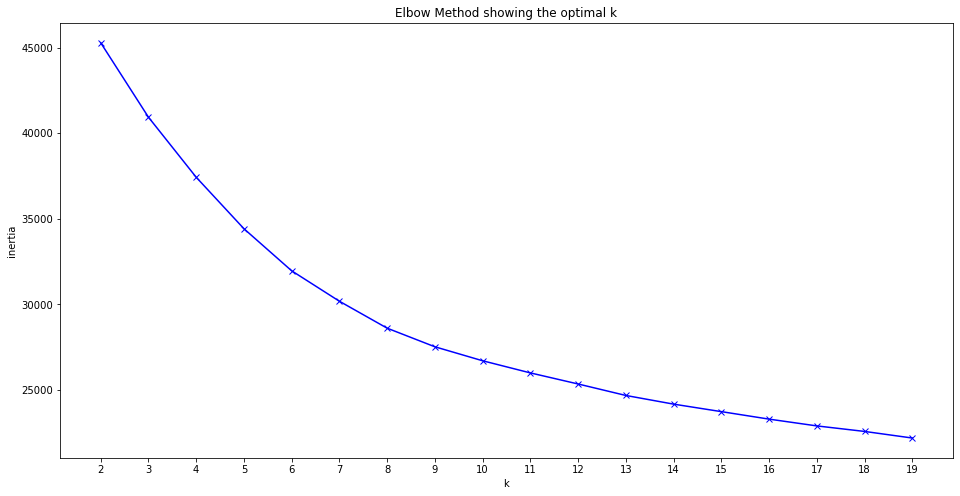

In [14]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

###  Choosing k with silhouette score

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

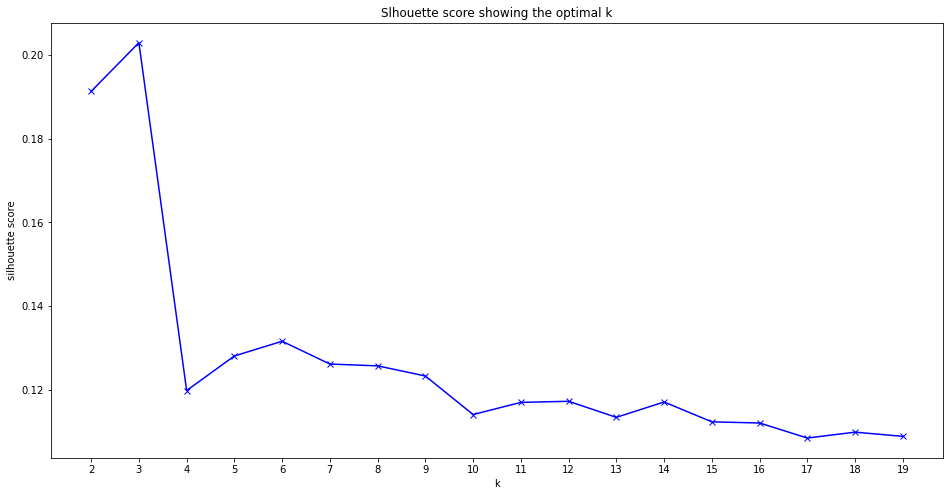

In [15]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

### Save the StandardScaler module for next use

In [16]:
pickle.dump(scaler, open('models/StandardScaler.pkl', 'wb'))

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1000)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1000)

In [18]:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1100
1    1977
2    2211
dtype: int64

In [19]:
clusters

array([0, 1, 0, ..., 2, 2, 0])

### Save the Kmeans model for next use

In [20]:
pickle.dump(kmeans, open('models/kmeans.pkl', 'wb'))

### View of clusters

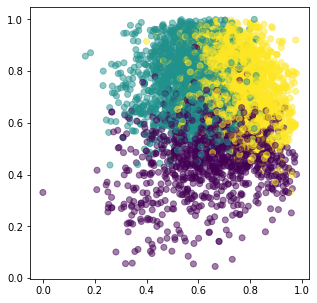

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(df['danceability'], df['energy'], c=clusters, alpha=0.5,)
plt.show()

### Agglomerative clustering

In [22]:
from sklearn import cluster

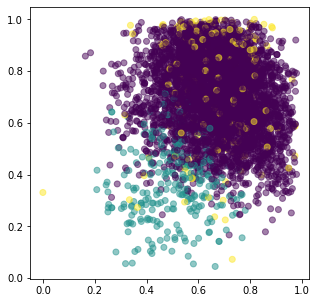

In [23]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(df['danceability'], df['energy'], c=pred,alpha=0.5)
plt.show()

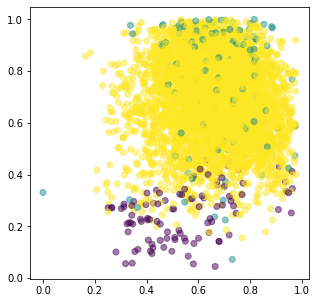

In [24]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(df['danceability'], df['energy'], c=pred,alpha=0.5)
plt.show()

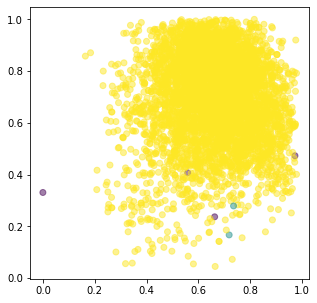

In [25]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='average')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(df['danceability'], df['energy'], c=pred,alpha=0.5)
plt.show()

### Check the correlation between sound features

In [26]:
correlation_matrix = data_features.corr()

correlation_matrix

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.017651,-0.005422,0.009305,0.188390,-0.128238,-0.004586,-0.076930,0.374859,-0.136988
energy,-0.017651,1.000000,0.006549,0.689652,-0.081195,-0.525769,0.081233,0.166686,0.355448,0.141186
key,-0.005422,0.006549,1.000000,-0.006294,0.019505,-0.001090,0.016340,0.015670,0.024645,0.012655
loudness,0.009305,0.689652,-0.006294,1.000000,-0.111774,-0.409571,-0.051834,0.096645,0.209020,0.065930
speechiness,0.188390,-0.081195,0.019505,-0.111774,1.000000,0.021196,-0.057928,0.067602,0.021156,0.098669
acousticness,-0.128238,-0.525769,-0.001090,-0.409571,0.021196,1.000000,-0.017134,-0.099020,-0.151995,-0.120874
instrumentalness,-0.004586,0.081233,0.016340,-0.051834,-0.057928,-0.017134,1.000000,0.004368,-0.053663,0.037734
liveness,-0.076930,0.166686,0.015670,0.096645,0.067602,-0.099020,0.004368,1.000000,0.028658,0.024849
valence,0.374859,0.355448,0.024645,0.209020,0.021156,-0.151995,-0.053663,0.028658,1.000000,0.027012
tempo,-0.136988,0.141186,0.012655,0.065930,0.098669,-0.120874,0.037734,0.024849,0.027012,1.000000


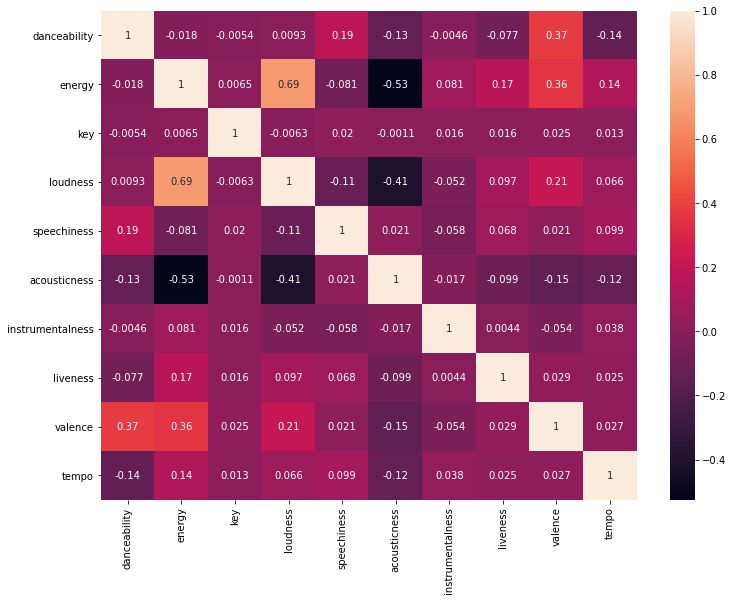

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [28]:
df['cluster'] = clusters

In [29]:
df.head()

,id,song,artist,album,type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,7dS5EaCoMnN7DzlpT6aRn2,Take Me To Church,Hozier,Hozier (Deluxe),audio_features,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.116,0.437,128.945,0
1,2V4bv1fNWfTcyRJKmej6Sj,Cooler Than Me - Single Mix,"Mike Posner, Gigamesh",31 Minutes to Takeoff,audio_features,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.689,0.625,129.965,1
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator, Kali Uchis",Flower Boy,audio_features,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.109,0.620,78.558,0
3,3gbBpTdY8lnQwqxNCcf795,Pompeii,Bastille,Bad Blood,audio_features,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.271,0.571,127.435,1
4,3ZFTkvIE7kyPt6Nu3PEa7V,Hips Don't Lie (feat. Wyclef Jean),"Shakira, Wyclef Jean","Oral Fixation, Vol. 2 (Expanded Edition)",audio_features,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.405,0.758,100.024,2


In [30]:
df = df.reset_index(drop=True)

In [31]:
df.to_csv('data/data_clusters.csv', index = False)

### Example that includes `0 cluster`

In [32]:
cluster1 = df[df['cluster'] == 0]
cluster1.sample(10)

,id,song,artist,album,type,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
4164,10iTEeb8hoM5jBGh0OxBOO,Cheat Codes for Hoes,"Shotgun Willy, TRAQULA",Cheat Codes for Hoes,audio_features,0.715,0.550,10,-10.293,0,0.4250,0.65100,0.000292,0.1720,0.824,116.669,0
3572,7cfvP13Bqb1EyCZQiYsLum,Can’t Take A Joke,Drake,Scorpion,audio_features,0.878,0.432,10,-9.852,0,0.1430,0.04100,0.000000,0.0571,0.441,86.956,0
3037,4ikwdrSQRvQP7QwbwteCTQ,Hetken maailma on tässä,PistePiste,Hetken maailma on tässä,audio_features,0.669,0.614,1,-9.764,1,0.0358,0.25000,0.000000,0.0478,0.729,89.986,0
585,3AfT3nmctE9nlndrFgshXH,Hurt,Christina Aguilera,Keeps Gettin' Better: A Decade Of Hits,audio_features,0.254,0.285,4,-7.112,0,0.0382,0.76900,0.000000,0.0997,0.101,74.858,0
4283,1A013Yn2Thub20PCo5GFjL,Pohja laahaa (feat. Kube),"Eevil Stöö, OPA, Pehmee Goo, Kube",Pohja laahaa (feat. Kube),audio_features,0.810,0.508,11,-10.109,0,0.1650,0.00903,0.000000,0.0934,0.459,100.012,0
2458,3kxfsdsCpFgN412fpnW85Y,Redbone,Childish Gambino,"""Awaken, My Love!""",audio_features,0.745,0.356,1,-10.425,1,0.0941,0.17200,0.009430,0.1230,0.607,160.033,0
1693,5tz69p7tJuGPeMGwNTxYuV,1-800-273-8255,"Logic, Alessia Cara, Khalid",Everybody,audio_features,0.620,0.574,5,-7.788,0,0.0479,0.56900,0.000000,0.1900,0.357,100.023,0
3311,4DG4um6R0wx4WrqhhACc5g,Super Mario Bros - Original,Stryker Pose,Super Mario Redux,audio_features,0.000,0.331,0,-8.115,1,0.0000,0.03210,0.917000,0.0831,0.000,0.000,0
4119,7pBrj5rt4SSxXwFKOyZfHR,Dissolve,Absofacto,Thousand Peaces,audio_features,0.688,0.582,6,-10.668,0,0.0542,0.23000,0.000157,0.0663,0.872,85.486,0
2649,1NMludJsG9lsiEi8gL7ftN,Kolme pientä sanaa,Anna Puu,Iskelmägaala 2013,audio_features,0.556,0.443,2,-10.114,1,0.0308,0.15700,0.001390,0.1040,0.371,191.893,0


### Import File "Top 100 Hot Songs" from https://www.billboard.com/charts/hot-100.

In [33]:
df_top100 = pd.read_csv('data/data_hot_100.csv')
df_top100

,song,artist
0,We Don't Talk About Bruno,"Carolina Gaitan, Mauro Castillo, Adassa, Rhenz..."
1,Do We Have A Problem?,Nicki Minaj X Lil Baby
2,Easy On Me,Adele
3,Heat Waves,Glass Animals
4,Stay,The Kid LAROI & Justin Bieber
5,Super Gremlin,Kodak Black
6,abcdefu,GAYLE
7,Shivers,Ed Sheeran
8,Ghost,Justin Bieber
9,Surface Pressure,Jessica Darrow


### Check if there is a song on the `Billboard Hot 100`, suggest a song recommendation from the `Billboard Hot 100`. If not, suggest a song recommendation from `big playlist from Spotify`.

In [34]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import getpass

In [35]:
cl_id = getpass.getpass('Enter client_id: ')
cl_secret = getpass.getpass('Enter client_secret: ')

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = cl_id, client_secret = cl_secret))

Enter client_id: ········
Enter client_secret: ········


In [89]:
user_song = str(input('Enter song: ')).lower()
user_artist = str(input('Enter artist: ')).lower()

Enter song: song 2
Enter artist: Blur


In [90]:
def get_from_top100(song_title, artist_name, data):
    # This function needs title, artist, and top100 dataframe
    # Set initial variables
    rec_title, rec_artist = song_title, artist_name
    # Ganerate random index
    random_index = random.choice(range(data.shape[0]))
    # Repeat search until song is not the same
    while ( rec_title.lower() == song_title ) & ( rec_artist.lower() == artist_name ):
        rec_title = data.loc[random_index]['song']
        rec_artist = data.loc[random_index]['artist']
    print('Recommended song is:\nArtist: {}\nTitle: {}'.format(rec_artist, rec_title))

In [91]:
def get_features(song_title, artist_name):
    # Connect to spotify
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=cl_id, client_secret=cl_secret))
    # Search for the song and limit to 1 best match
    search_result = sp.search(q = song_title + ' artist:' + artist_name, type='track', limit=1)
    # Get URI
    uri = search_result["tracks"]["items"][0]['id']
    # Get song featuresd from Spotify
    features = sp.audio_features(uri)[0]
    return features

In [92]:
if len(df_top100[(df_top100['song'].str.lower() == user_song) & (df_top100['artist'].str.lower() == user_artist)]) != 0:
    
    get_from_top100(user_song, user_artist, df_top100)
    
else:
    
    song_features = get_features(user_song, user_artist)

In [93]:
song_features

{'danceability': 0.674,
 'energy': 0.789,
 'key': 8,
 'loudness': -6.903,
 'mode': 1,
 'speechiness': 0.0676,
 'acousticness': 0.00178,
 'instrumentalness': 0.0071,
 'liveness': 0.0754,
 'valence': 0.918,
 'tempo': 129.804,
 'type': 'audio_features',
 'id': '1FTSo4v6BOZH9QxKc3MbVM',
 'uri': 'spotify:track:1FTSo4v6BOZH9QxKc3MbVM',
 'track_href': 'https://api.spotify.com/v1/tracks/1FTSo4v6BOZH9QxKc3MbVM',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1FTSo4v6BOZH9QxKc3MbVM',
 'duration_ms': 121160,
 'time_signature': 4}

In [94]:
df_features = pd.DataFrame.from_dict(song_features, orient='index').transpose()

song_features = df_features[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                            'liveness', 'valence', 'tempo']]
song_features

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.674,0.789,8,-6.903,0.0676,0.00178,0.0071,0.0754,0.918,129.804


In [95]:
song_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      1 non-null      object
 1   energy            1 non-null      object
 2   key               1 non-null      object
 3   loudness          1 non-null      object
 4   speechiness       1 non-null      object
 5   acousticness      1 non-null      object
 6   instrumentalness  1 non-null      object
 7   liveness          1 non-null      object
 8   valence           1 non-null      object
 9   tempo             1 non-null      object
dtypes: object(10)
memory usage: 208.0+ bytes


In [96]:
for i in song_features.columns:
    song_features[i] = song_features[i].astype(float)

In [97]:
song_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1 non-null      float64
 1   energy            1 non-null      float64
 2   key               1 non-null      float64
 3   loudness          1 non-null      float64
 4   speechiness       1 non-null      float64
 5   acousticness      1 non-null      float64
 6   instrumentalness  1 non-null      float64
 7   liveness          1 non-null      float64
 8   valence           1 non-null      float64
 9   tempo             1 non-null      float64
dtypes: float64(10)
memory usage: 208.0 bytes


In [98]:
scaler = pickle.load(open('models/StandardScaler.pkl','rb'))
kmeans = pickle.load(open('models/kmeans.pkl','rb')) 

In [99]:
user_song_scaled = scaler.transform(song_features)
user_song_cluster = kmeans.predict(user_song_scaled)

clust_ = df[df['cluster'] == list(user_song_cluster)[0]]
random_song = random.choice(range(clust_.shape[0]))
title = clust_.iloc[random_song]['song']
artist = clust_.iloc[random_song]['artist']

#print('Recommendation: ', 'Song: ', title, 'Artist: ', artist)
print('Recommended song from Spotify tracklist:\nArtist: {}\nTitle: {}'.format(artist, title))


Recommended song from Spotify track list:
Artist: Future
Title: Fresh Air
